# Instrucciones para completar el proyecto

Paso 1. Abre el archivo de datos y estudia la información general

Paso 2. Prepara los datos

- Reemplazaremos los nombres de las columnas (minúsculas).

- Convertiremos los datos en los tipos necesarios.

- Describiremos las columnas en las que los tipos de datos han sido cambiados y explica por qué.

- Si es necesario, eligiremos la manera de tratar los valores ausentes:

- Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.

- ¿Por qué creo que los valores están ausentes? Brindaremos explicaciones posibles.

- Prestaremos atención a la abreviatura TBD: significa "to be determined" (a determinar). Especificaremos cómo pienso manejar estos casos.

- Calcularemos las ventas totales (la suma de las ventas en todas las regiones) para cada juego y colocaremos estos valores en una columna separada.

Paso 3. Analiza los datos

- Miraremos cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

- Observaremos cómo varían las ventas de una plataforma a otra. Eligiremos las plataformas con las mayores ventas totales y construiremos una distribución basada en los datos de cada año. Buscaremos las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

- Determinaremos para qué período debemos tomar datos. Para hacerlo miraremos las respuestas a las preguntas anteriores. Los datos deberían permitirnos construir un modelo para 2017.

- Trabajaremos solo con los datos que consideramos relevantes. Ignoraremos los datos de años anteriores.

- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elegiremos varias plataformas potencialmente rentables.

- Crearemos un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describamos los hallazgos.

- Miraremos cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crearemos un gráfico de dispersión y calcularemos la correlación entre las reseñas y las ventas. Sacaremos conclusiones.

- Teniendo en cuenta las conclusiones compararemos las ventas de los mismos juegos en otras plataformas.

- Echaremos un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determinaremos:

- Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

- Los cinco géneros principales. Explicar la diferencia.

- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

Paso 5. Prueba las siguientes hipótesis:

 Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

- Establecer tu mismo el valor de umbral alfa.

Explica:

- Cómo formulaste las hipótesis nula y alternativa.

- Qué criterio utilizaste para probar las hipótesis y por qué

Paso 6. Escribe una conclusión general

E = todas las edades,

T = a partir de 15 años,

M = mayor de 18 años,

E10+ = a partir de 10 años,

EC = a partir de 3 años,

K-A = Niños en compañia de un adulto,

RP = Calificacion pendiente,

AO = Adultos únicamente

## Paso 1. Abre el archivo de datos y estudia la información general

In [1]:
# Librerias a utilizar
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
%matplotlib inline
from math import factorial
from scipy import stats as st
import random

In [2]:
# Carga de archivos 
try:
    df = pd.read_csv(r"C:\Users\seba\Desktop\games.csv")
except:
    df = pd.read_csv("/datasets/games.csv")

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
#Porcentaje de valores nulos
val_au_porcentaje = (df.isnull().sum() / len(df)) * 100
val_au_porcentaje

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [8]:
df.shape

(16715, 11)

In [9]:
df.duplicated().sum()

0

**Conclusión**

De la información general, podemos ver que 6 columnas tienen valores nulos. La columna Name tiene 0,0120 % de valores nulos, Year_of_Release tiene 1,6093 %, Genre tiene 0,0120 %, Critic_Score tiene 51,3192 %, User_Score tiene 40,0897 % y Rating tiene 40,4786 % de valores nulos. 

Además, necesitamos convertir los datos al tipo requerido y lidiar con los valores faltantes en el conjunto de datos.

Year_of_Release está en float, debe convertirse a int. 

User_Score es una cadena y debe convertirse a int.

## Paso 2. Prepara los datos

In [10]:
#Convertir los nombres de las columnas todas a minúsculas
def lowercase_columns(df):
    return df.rename(str.lower, axis='columns')

df = lowercase_columns(df)
print(df.columns) 

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Convertir los tipos de datos

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Eliminaremos los datos nulos de name y genre dado su bajo porcentaje de valores NaN**

In [12]:
df = df.dropna(subset=['name', 'genre']).reset_index(drop=True)

In [13]:
df['year_of_release'].isna().sum()

269

In [14]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [16]:
df['year_of_release'].isna().sum()

0

In [17]:
df = df.copy()

In [18]:
df['year_of_release'] = df['year_of_release'].astype('int64')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [20]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [21]:
df['user_score'] = df['user_score'].astype('float64')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [23]:
df['rating'] = df['rating'].fillna("Valor desconocido")

In [24]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Valor desconocido
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Valor desconocido


## Calcularemos las ventas totales (la suma de las ventas en todas las regiones) para cada juego y colocaremos estos valores en una columna separada.

In [25]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Valor desconocido,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Valor desconocido,31.38


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


**Conclusión**

En esta sección, preparamos los datos convirtiendo los nombres de las columnas a minúsculas. Eliminamos los valores faltantes en la columna de name, genre. Las columnas critic_score y user_score las dejamos con los valores ausentes, ya que aplicando la media o mediana para reemplazarlos, esto favorecería o perjudicaría ciertos juegos. La abreviatura tbd, que significa "por determinar", se asignó a nulo y se manejó como "NaN" en el conjunto de datos. Convertimos los tipos de datos a los tipos correctos y calculamos las ventas totales en todas las regiones.

## Paso 3. Analiza los datos

### Cuantos juegos fueron lanzados por año

In [27]:
games_df = (df[['year_of_release', 'name']]
                .groupby('year_of_release')
                .agg('count')
                .sort_values('year_of_release')).reset_index()
games_df

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


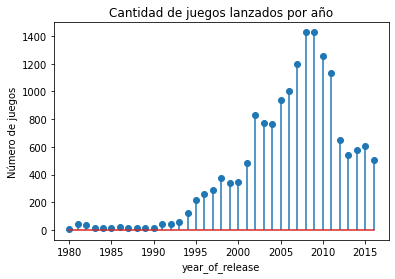

In [28]:
plt.stem(games_df['year_of_release'],games_df['name'])
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('year_of_release')
plt.ylabel('Número de juegos')

plt.show()

**El diagrama de piruleta anterior muestra que se lanzaron más juegos entre los años 2001 y 2016. La mayoría de los juegos se lanzaron entre los años 2005 y 2011. El año con la menor cantidad de juegos lanzados fue 1980. El año con la mayor cantidad de juegos lanzados fue 2008. La disminución en la cantidad de juegos lanzados después del año 2008 se puede atribuir al aumento de juegos móviles desde 2008 en adelante, por lo que sí son significativos los datos de cada periodo**

### Observaremos cómo varían las ventas de una plataforma a otra

In [29]:
platform_sales = (df[['platform', 'total_sales']]
                .groupby('platform')
                .agg('count')
                .sort_values(by= 'total_sales', ascending=False)).reset_index()
platform_sales

,platform,total_sales
0,PS2,2127
1,DS,2121
2,PS3,1306
3,Wii,1286
4,X360,1232
5,PSP,1193
6,PS,1190
7,PC,957
8,GBA,811
9,XB,803


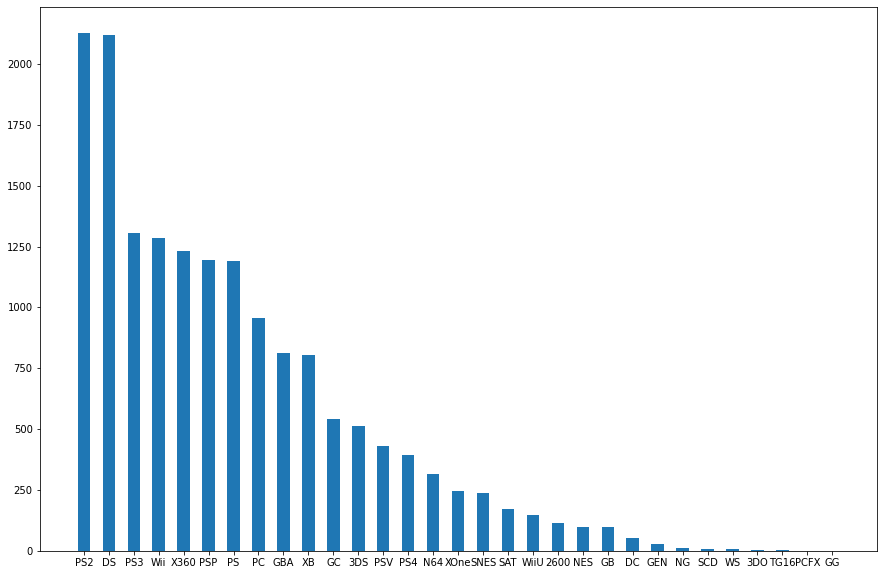

In [30]:
#plot de ventas totales por plataformas
x = platform_sales['platform']
y = platform_sales['total_sales']
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(x, y , width= 0.5)
plt.show()

Podemos ver en el gráfico anterior que hubo variaciones en las ventas entre plataformas. Las cinco principales plataformas fueron PS2, DS, PS3, Wii y X360 respectivamente. Las plataformas con menos ventas fueron SCD, WS, 3DO, TG16, PCFX y GG.

### Eligiremos las 7 plataformas con las mayores ventas totales y construiremos una distribución basada en los datos de cada año. 

### ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

**Veremos la relación de ps2 de ventas por año**

In [31]:
ps2_sales_years = df.query('platform == "PS2"').pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc= 'sum')
ps2_sales_years

,total_sales
year_of_release,
2000,39.17
2001,166.43
2002,205.38
2003,184.31
2004,211.81
2005,160.66
2006,103.42
2007,75.99
2008,53.90


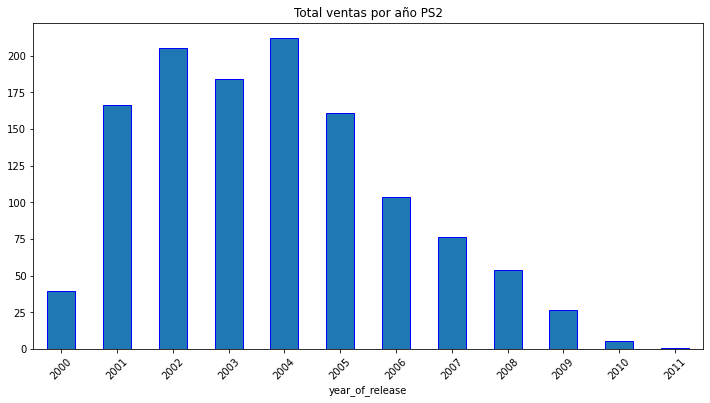

In [32]:
ps2_sales_years.plot(kind='bar', figsize=(12,6), rot=45, title='Total ventas por año PS2', edgecolor='blue', legend=False);

**Veremos la relación de DS de ventas por año**

In [33]:
ds_sales_years = df.query('platform == "DS"').pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc= 'sum')
ds_sales_years

,total_sales
year_of_release,
1985,0.02
2004,17.27
2005,130.14
2006,119.81
2007,146.94
2008,145.31
2009,119.54
2010,85.02
2011,26.18


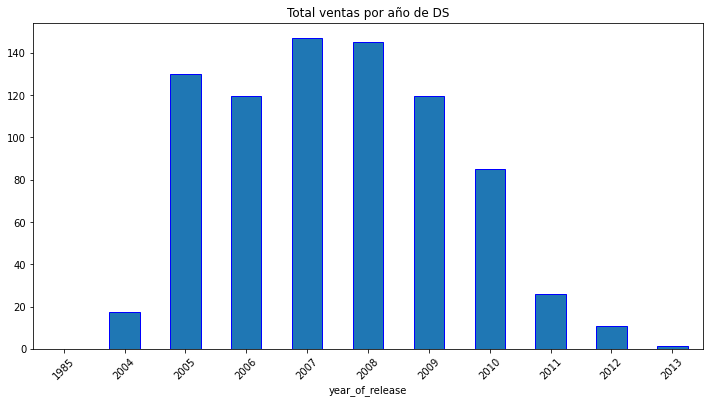

In [34]:
ds_sales_years.plot(kind='bar', figsize=(12,6), rot=45, title='Total ventas por año de DS', edgecolor='blue', legend=False);

**Veremos la relación de PS3 de ventas por año**

In [35]:
ps3_sales_years = df.query('platform == "PS3"').pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc= 'sum')
ps3_sales_years

,total_sales
year_of_release,
2006,20.96
2007,73.19
2008,118.52
2009,130.93
2010,142.17
2011,156.78
2012,107.36
2013,113.25
2014,47.76


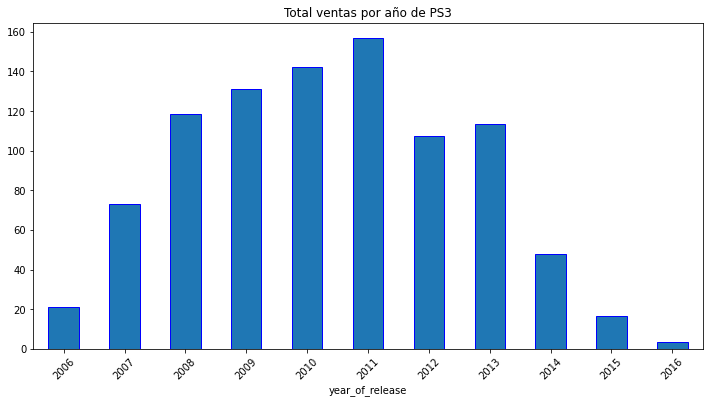

In [36]:
ps3_sales_years.plot(kind='bar', figsize=(12,6), rot=45, title='Total ventas por año de PS3', edgecolor='blue', legend=False);

**Veremos la relación de la consola Wii de ventas por año**

In [37]:
wii_sales_years = df.query('platform == "Wii"').pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc= 'sum')
wii_sales_years

,total_sales
year_of_release,
2006,137.15
2007,152.77
2008,171.32
2009,206.97
2010,127.95
2011,59.65
2012,21.71
2013,8.59
2014,3.75


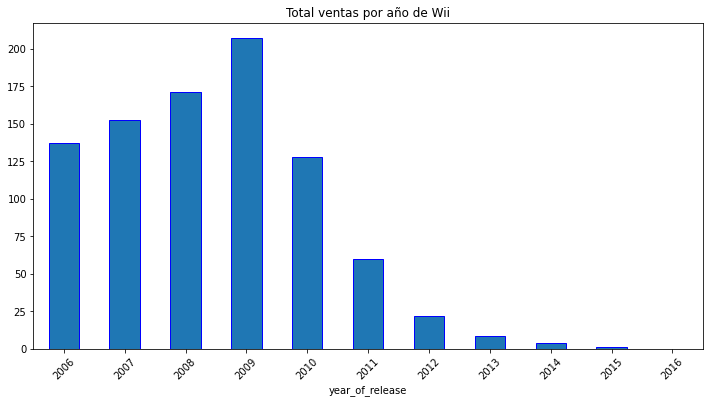

In [38]:
wii_sales_years.plot(kind='bar', figsize=(12,6), rot=45, title='Total ventas por año de Wii', edgecolor='blue', legend=False);

**Veremos la relación de X360 de ventas por año**

In [39]:
x360_sales_years = df.query('platform == "X360"').pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc= 'sum')
x360_sales_years

,total_sales
year_of_release,
2005,8.25
2006,51.62
2007,95.41
2008,135.26
2009,120.29
2010,170.03
2011,143.84
2012,99.74
2013,88.58


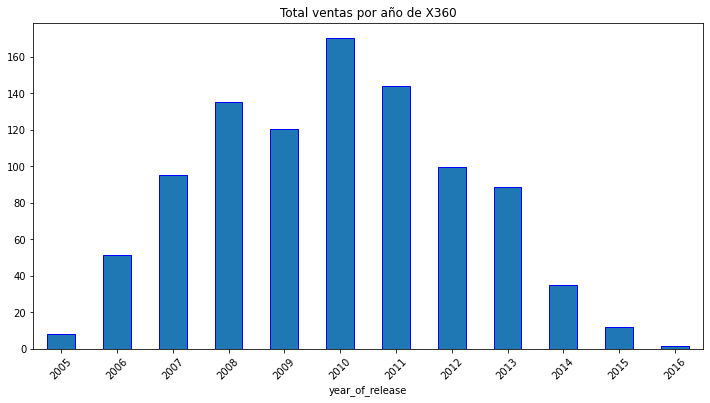

In [40]:
x360_sales_years.plot(kind='bar', figsize=(12,6), rot=45, title='Total ventas por año de X360', edgecolor='blue', legend=False);

**Veremos la relación de PSP de ventas por año**

In [41]:
psp_sales_years = df.query('platform == "PSP"').pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc= 'sum')
psp_sales_years

,total_sales
year_of_release,
2004,7.06
2005,43.84
2006,55.32
2007,46.93
2008,34.55
2009,37.78
2010,35.04
2011,17.82
2012,7.69


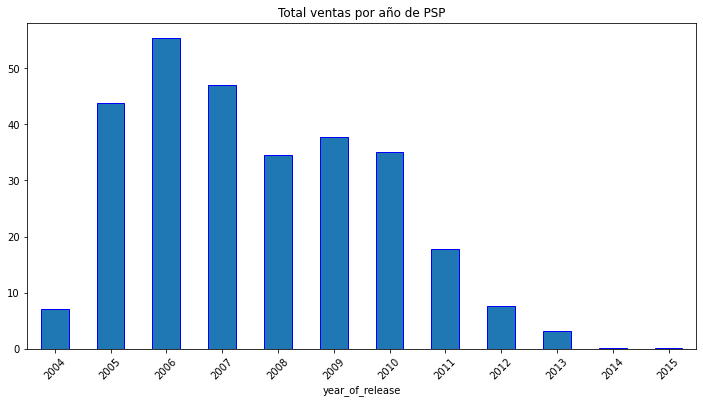

In [42]:
psp_sales_years.plot(kind='bar', figsize=(12,6), rot=45, title='Total ventas por año de PSP', edgecolor='blue', legend=False);

**Veremos la relación de PS de ventas por año**

In [43]:
ps_sales_years = df.query('platform == "PS"').pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc= 'sum')
ps_sales_years

,total_sales
year_of_release,
1994,6.03
1995,35.96
1996,94.70
1997,136.17
1998,169.49
1999,144.53
2000,96.37
2001,35.59
2002,6.67


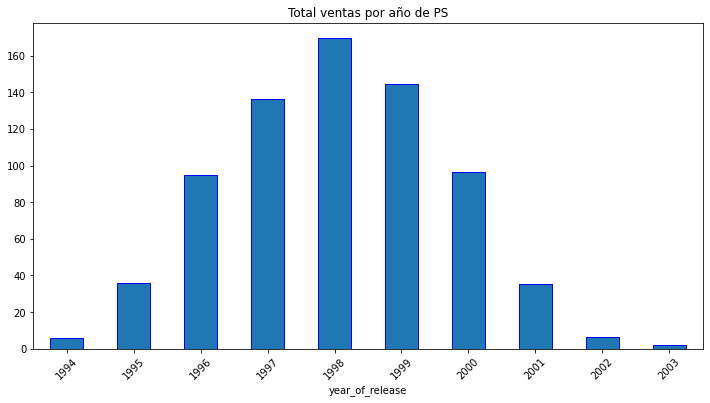

In [44]:
ps_sales_years.plot(kind='bar', figsize=(12,6), rot=45, title='Total ventas por año de PS', edgecolor='blue', legend=False);

**Veremos la relación de PC de ventas por año**

In [45]:
pc_sales_years = df.query('platform == "PC"').pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc= 'sum')
pc_sales_years

,total_sales
year_of_release,
1985,0.04
1988,0.03
1992,3.03
1994,12.87
1995,4.22
1996,10.58
1997,11.27
1998,3.26
1999,4.74


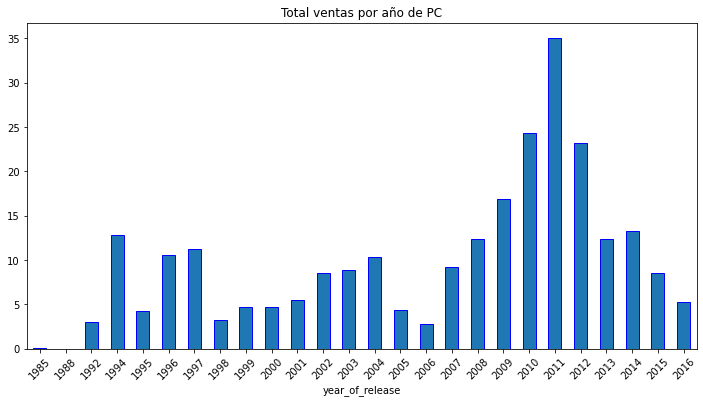

In [46]:
pc_sales_years.plot(kind='bar', figsize=(12,6), rot=45, title='Total ventas por año de PC', edgecolor='blue', legend=False);

**Conclusión**

De los gráficos trazados podemos concluir lo siguiente:

- PS2 fue popular entre 2001 y 2007. Las ventas comenzaron a caer después de 2007, lo que coincidió con la aparición de PS3. PS2 solía ser popular pero ahora tiene cero ventas.

- DS fue popular entre 2005 y 2010.

- PS3 fue popular entre 2008 y 2013. Las ventas cayeron drásticamente entre 2015 y 2016.

- Wii fue popular entre 2006 y 2011. Su popularidad se ha reducido desde que ahora tiene cero ventas.

- X360 fue popular entre 2008 y 2011

- PSP fue popular entre 2005 y 2010.

- PS tuvo su apogeo entre 1996 y 2000.

- La PC tuvo la venta más alta en 2011. La PC es la plataforma con la vida útil más larga entre las otras plataformas. La PC se vende desde hace unos 30 años.

- Por lo general, se necesitan alrededor de 6 años para que aparezcan nuevas plataformas y las antiguas desaparezcan.

### Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

### Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [47]:
#Filtraremos los datos del 2005 al 2011, ya que el apogeo de ventas de juegos
new_data = df.query('year_of_release >= 2013 and year_of_release <=2016')


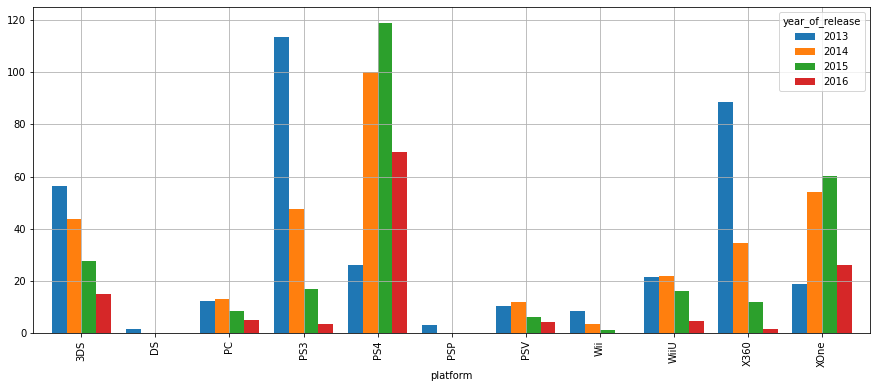

In [48]:
(new_data
     .pivot_table(index='platform',columns='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar',grid=True,figsize=(15, 6),width=0.8)
);

In [49]:
sales_df = pd.pivot_table(new_data, index='year_of_release', columns= 'platform', values='total_sales', aggfunc='sum', fill_value=0)
sales_df

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [50]:
df['year_of_release'].min(),df['year_of_release'].max()

(1980, 2016)

**Conclusión**

Elegimos el rango de años entre el 2013 y 2016, ya que es el rango de fechas que nos ayudaría a crear un modelo para el 2017.

En base al gráfico mostrado, se concluye que el año 2016 hubo caída de ventas en todas las consolas.

Las consolas que hasta el 2015 iban al alza son PS4 y XOne

PS3 va en caída desde 2014 en adelante, coincide con la aparición de la PS4 el año 2013.

### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

In [51]:
grouped  = new_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
grouped

,platform,year_of_release,total_sales
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,DS,2013,1.54
5,PC,2013,12.38
6,PC,2014,13.28
7,PC,2015,8.52
8,PC,2016,5.25
9,PS3,2013,113.25


In [52]:
ordenado = grouped.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).reset_index()['platform']
ordenado

0      PS4
1      PS3
2     XOne
3      3DS
4     X360
5     WiiU
6       PC
7      PSV
8      Wii
9      PSP
10      DS
Name: platform, dtype: object

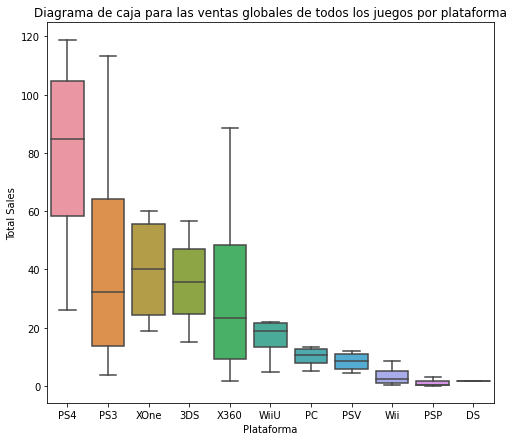

In [53]:
plt.figure(figsize=(8,7))
sns.boxplot(x='platform', y='total_sales', data=grouped, order=ordenado)
plt.title('Diagrama de caja para las ventas globales de todos los juegos por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Total Sales');

In [54]:
grouped_mean  = new_data.groupby(['platform', 'year_of_release'])['total_sales'].mean().reset_index()
grouped_mean

,platform,year_of_release,total_sales
0,3DS,2013,0.621648
1,3DS,2014,0.547000
2,3DS,2015,0.323023
3,3DS,2016,0.329130
4,DS,2013,0.192500
5,PC,2013,0.325789
6,PC,2014,0.282553
7,PC,2015,0.170400
8,PC,2016,0.097222
9,PS3,2013,0.898810


In [55]:
ordenado_mean = grouped_mean.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).reset_index()['platform']
ordenado_mean

0      PS4
1     XOne
2     X360
3     WiiU
4      3DS
5      Wii
6      PS3
7       PC
8      PSV
9       DS
10     PSP
Name: platform, dtype: object

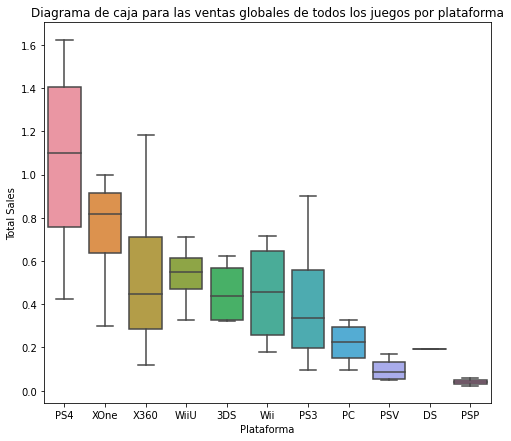

In [56]:
plt.figure(figsize=(8,7))
sns.boxplot(x='platform', y='total_sales', data=grouped_mean, order=ordenado_mean)
plt.title('Diagrama de caja para las ventas globales de todos los juegos por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Total Sales');

**Conclusión**

En relación al gráfico de caja podemos visualizar lo siguiente:

La lista ordenada es una matriz de plataformas desde la más rentable hasta la menos rentable. Usamos esta lista ordenada para trazar un diagrama de caja para facilitar la comparación. Podemos ver que la plataforma PS4 tiene una media más alta durante el año que otras plataformas. También podemos observar que las diferencias en las ventas también son significativas.


### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [57]:
#Haremos una tabla de correlación entre las reseñas y las ventas de PS4
new_data[new_data.platform == 'PS4'].reset_index()[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


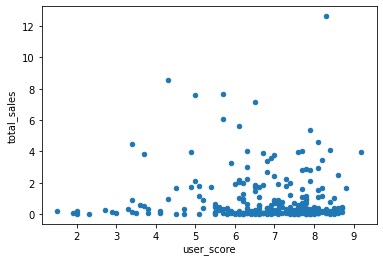

In [58]:
df.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter');

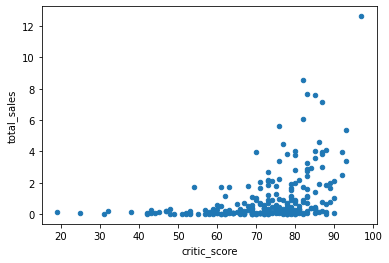

In [59]:
df.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter');

In [60]:
#Haremos una tabla de correlación para la plataforma XOne
new_data[new_data.platform == 'XOne'].reset_index()[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


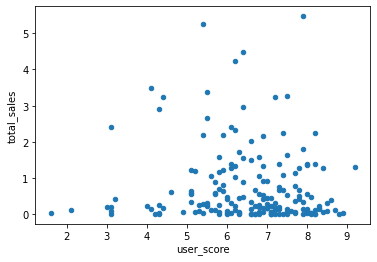

In [61]:
df.query('platform == "XOne"').plot(x='user_score', y='total_sales', kind='scatter');

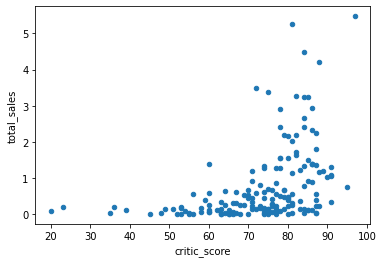

In [62]:
df.query('platform == "XOne"').plot(x='critic_score', y='total_sales', kind='scatter');

In [63]:
#Haremos una tabla de correlación para la plataforma X360
new_data[new_data.platform == 'X360'].reset_index()[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.520946,0.350345
user_score,0.520946,1.000000,-0.011742
total_sales,0.350345,-0.011742,1.000000


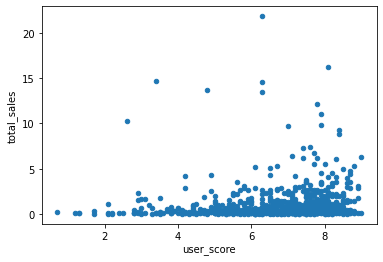

In [64]:
df.query('platform == "X360"').plot(x='user_score', y='total_sales', kind='scatter');

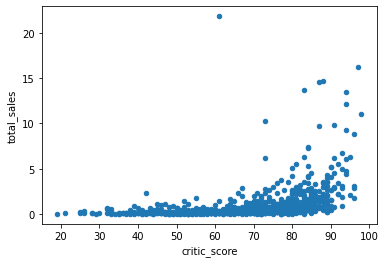

In [65]:
df.query('platform == "X360"').plot(x='critic_score', y='total_sales', kind='scatter');

**Conclusión**


Al realizar gráficos de dispersión de 3 plataformas, se concluyó que la correlación de critic_score es mas fuerte que las de user_score, aunque sigue siendo una correlación débil.

In [66]:
new_data.query('platform == "PS4"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Valor desconocido,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Valor desconocido,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16230,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,Valor desconocido,0.01
16233,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Valor desconocido,0.01
16255,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16259,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

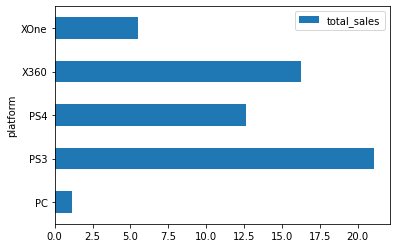

In [67]:
(new_data
     .query('name == "Grand Theft Auto V"')
     .pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index()
     .plot(x='platform', y='total_sales', kind='barh')
);

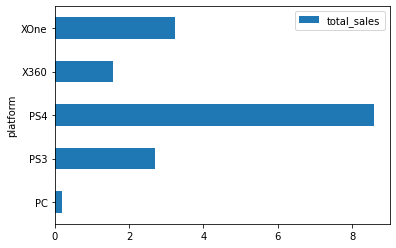

In [68]:
(new_data
     .query('name == "FIFA 16"')
     .pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index()
     .plot(x='platform', y='total_sales', kind='barh')
);

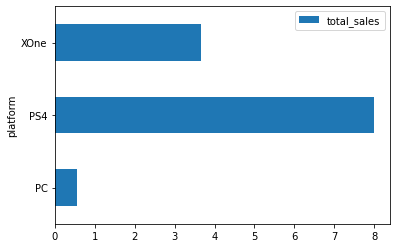

In [69]:
(new_data
     .query('name == "Star Wars Battlefront (2015)"')
     .pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index()
     .plot(x='platform', y='total_sales', kind='barh')
);

### Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [70]:
df_genre = new_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
df_genre

,genre,total_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


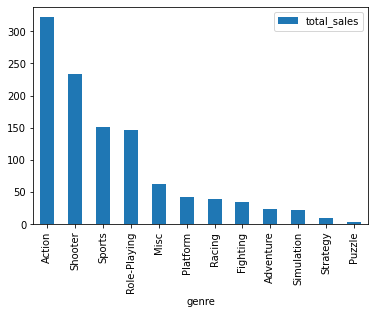

In [71]:
(df_genre.plot(x='genre', y='total_sales', kind='bar')
);

En el gráfico de barras, podemos ver que los géneros más rentables son los géneros Action, Shooter y Sports. El género menos rentable es el género de Puzzle. Para generalizar sobre el género, tenemos que tomar las ventas totales promedio de todos los géneros.

In [72]:
grouped_genre  = new_data.groupby(['genre', 'year_of_release'])['total_sales'].mean().reset_index()
grouped_genre

,genre,year_of_release,total_sales
0,Action,2013,0.833401
1,Action,2014,0.517181
2,Action,2015,0.284664
3,Action,2016,0.169157
4,Adventure,2013,0.101500
5,Adventure,2014,0.074267
6,Adventure,2015,0.151111
7,Adventure,2016,0.068214
8,Fighting,2013,0.354500
9,Fighting,2014,0.689130


In [73]:
genre_order = grouped_genre.groupby(['genre'])['total_sales'].mean().sort_values(ascending=False).reset_index()['genre']
genre_order

0          Shooter
1           Sports
2         Platform
3     Role-Playing
4           Racing
5           Action
6         Fighting
7             Misc
8       Simulation
9           Puzzle
10        Strategy
11       Adventure
Name: genre, dtype: object

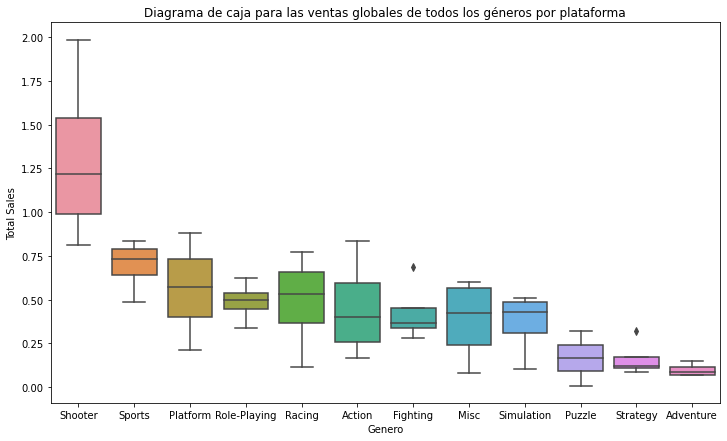

In [95]:
plt.figure(figsize=(12,7))
sns.boxplot(x='genre', y='total_sales', data=grouped_genre, order=genre_order)
plt.title('Diagrama de caja para las ventas globales de todos los géneros por plataforma')
plt.xlabel('Genero')
plt.ylabel('Total Sales');

**Conclusión**

Si observamos el diagrama de caja de las ventas totales promedio en todos los géneros, podemos concluir que los géneros Strategy y Adventure siguen siendo los géneros menos rentables. Además, los géneros Shooter y Sports son los géneros más rentables.

## Paso 4. Crea un perfil de usuario para cada región

### Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

**Las cinco plataformas principales en la región na**

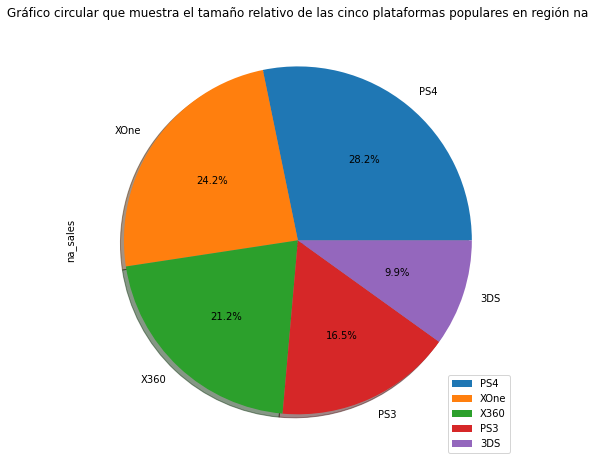

In [96]:
new_data_region = new_data.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)
top_5_platforms = new_data_region.head()
(top_5_platforms.set_index('platform')
                .plot(y='na_sales', kind='pie', 
                      title = 'Gráfico circular que muestra el tamaño relativo de las cinco plataformas populares en región na', 
                      figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

La plataforma con mayor cuota de mercado en la región NA es PS4 con un 28.2 %, mientras que 3DS tiene la menor cuota de mercado con un 9.9 %.

**Las cinco plataformas principales en la región eu**

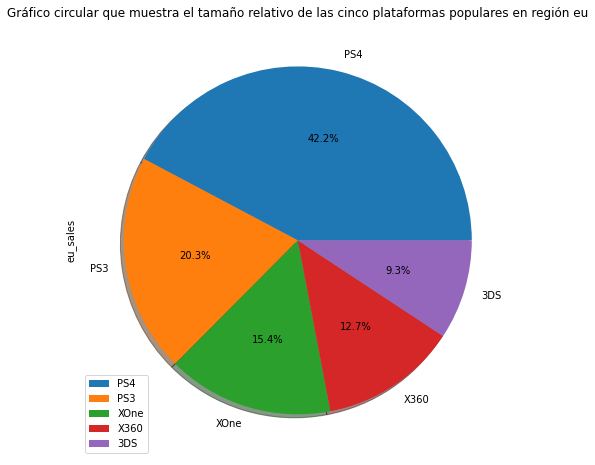

In [76]:
new_data_region = new_data.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
top_5_platforms = new_data_region.head()
(top_5_platforms.set_index('platform')
                .plot(y='eu_sales', kind='pie', 
                      title = 'Gráfico circular que muestra el tamaño relativo de las cinco plataformas populares en región eu', 
                      figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);


La plataforma con mayor cuota de mercado en la región eu es PS4 con un 42.2 %, mientras que 3DS tiene la menor cuota de mercado con un 9.3 %.

**Las cinco plataformas principales en la región jp**

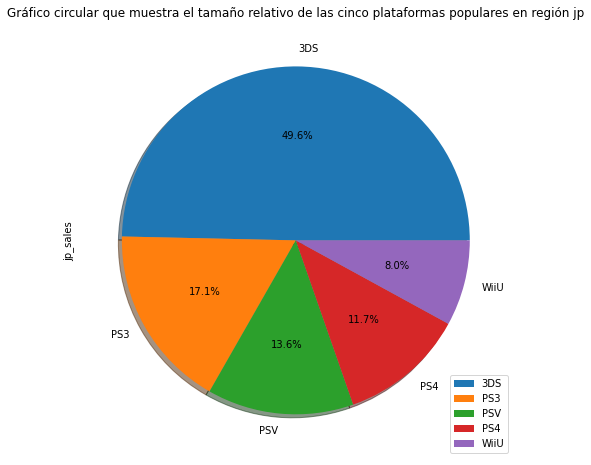

In [77]:
new_data_region = new_data.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
top_5_platforms = new_data_region.head()
(top_5_platforms.set_index('platform')
                .plot(y='jp_sales', kind='pie', 
                      title = 'Gráfico circular que muestra el tamaño relativo de las cinco plataformas populares en región jp', 
                      figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

La plataforma con mayor cuota de mercado en la región jp es 3DS con un 49.6 %, mientras que WiiU tiene la menor cuota de mercado con un 8 %.

**Conclusión**

Observamos varias variaciones en las cuotas de mercado en las cinco plataformas principales de una región a otra. En la región NA, PS4 tiene la mayor cuota de mercado. En la región de la UE, también PS4 tiene la mayor cuota de mercado. En la región de JP, el 3DS es el predominador total. 

### Los cinco géneros principales. Explica la diferencia.

**Region NA**

In [78]:
new_data_genre = new_data.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)
top_5_genre_na = new_data_genre.head()
top_5_genre_na.reset_index(drop=True)

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


**Region EU**

In [79]:
new_data_genre = new_data.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
top_5_genre_eu = new_data_genre.head()
top_5_genre_eu.reset_index(drop=True)

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


**Region JP**

In [80]:
new_data_genre = new_data.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
top_5_genre_jp = new_data_genre.head()
top_5_genre_jp.reset_index(drop=True)

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


**Conclusión**

La región NA y la región UE son bastante similares. La principal diferencia entre esas dos regiones es la presencia del género Misc en la región NA  frente a Racing en el mercado de la UE. La región JP es diferente de las otras regiones porque tiene el género Role-Playing que es el que mas vende, y el género Shooter es el que menos vende.

### Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

**Region NA**

In [97]:
new_data_ratings_na = new_data.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)
new_data_ratings_na = new_data_ratings_na.reset_index(drop=True)
new_data_ratings_na

,rating,na_sales
0,M,165.21
1,Valor desconocido,89.42
2,E,79.05
3,E10+,54.24
4,T,49.79


**Region EU**

In [98]:
new_data_ratings_eu = new_data.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
new_data_ratings_eu = new_data_ratings_eu.reset_index(drop=True)
new_data_ratings_eu

,rating,eu_sales
0,M,145.32
1,E,83.36
2,Valor desconocido,78.91
3,E10+,42.69
4,T,41.95


**Region JP**

In [99]:
new_data_ratings_jp = new_data.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
new_data_ratings_jp = new_data_ratings_jp.reset_index(drop=True)
new_data_ratings_jp

,rating,jp_sales
0,Valor desconocido,85.05
1,T,20.59
2,E,15.14
3,M,14.11
4,E10+,5.89


**Conclusión**

Mirando el resultado, la calificación ESRB afecta las ventas en regiones individuales. En cada una de las tres regiones, las calificaciones E, T, M y E10+ obtuvieron las ventas más altas. 

**Conclusión**

Observamos varias variaciones en las cuotas de mercado en las cinco plataformas principales de una región a otra. En la región NA, PS4 tiene la mayor cuota de mercado. En la región de la UE, PS4 tiene la mayor cuota de mercado. En la región de Japón, la 3DS tiene la mayor cuota de mercado. La región NA y la región UE son bastante similares. La principal diferencia entre esas dos regiones es la presencia del género Misc en el mercado de NA frente a Racing en el mercado de la UE. La región JP es diferente de las otras regiones en los generos. Al observar las calificaciones de las regiones, descubrimos que la calificación ESRB afecta las ventas en regiones individuales. En las Regiones NA y EU, las calificaciones que más vendieron fueron M, E, E10+ y por último T. La región JP, la calificación mas vendida es valor desconocido, después serían T, E, M y E10+.

## Paso 5. Prueba las siguientes hipótesis:

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

- Hipotesis Nula: Las calificaciones promedio de los usuarios de Xbox One son las mismas que las calificaciones promedio de los usuarios de las plataformas de PC

- Hipotesis alternativa: Las calificaciones promedio de los usuarios de Xbox One son diferentes que las calificaciones promedio de los usuarios de las plataformas de PC

In [84]:
from scipy.stats import levene

In [109]:
#Calificaciones promedio de xbox one y PC
xbox1_avg = new_data[new_data.platform == 'XOne']['user_score'].mean()
pc_avg = new_data[new_data.platform == 'PC']['user_score'].mean()
print('La valoración media de los usuarios de Xbox1 es {:.3f}'.format(xbox1_avg) + ' and ' + \
      'La valoración media de los usuarios de PC es {:.3f}'.format(pc_avg))

La valoración media de los usuarios de Xbox1 es 6.521 and La valoración media de los usuarios de PC es 6.270


In [103]:
[np.var(x, ddof=1) for x in [xbox_one, pc]]

[1.9069968429360695, 2.3492243750768527]

In [108]:
xbox_one = new_data[new_data.platform == 'XOne']['user_score']
pc = new_data[new_data.platform == 'PC']['user_score']

# Establecer significación estadística crítica
alpha = 0.05

# probar la hipótesis de que las medias de las dos poblaciones independientes son las mismas
results = st.ttest_ind(xbox_one, pc, equal_var = False, nan_policy='omit')
print('p-value: ', results.pvalue)

# comparar el valor p con el nivel de significancia
if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No rechazamos la hipótesis nula')

p-value:  0.1475959401343032
No rechazamos la hipótesis nula


**Conclusión**

Formulamos la hipótesis nula al afirmar que no hay diferencia entre las calificaciones promedio de los usuarios de las plataformas Xbox One y PC. Utilizamos un nivel de significación de 0,05. Dado que el valor p es mayor que = 0,05, no podemos rechazar la hipótesis nula. La evidencia sugiere que no existe una diferencia estadísticamente significativa entre las calificaciones promedio de los usuarios de las plataformas Xbox One y PC, es decir, las calificaciones promedio de los usuarios de Xbox One y las calificaciones promedio de los usuarios de las plataformas PC son las mismas.

### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

- Hipotesis Nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

- Hipotesis Alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [113]:
#Calificaciones promedio de usuarios de los géneros Acción y Deportes
action_avg = new_data[new_data.genre == 'Action']['user_score'].mean()
sports_avg = new_data[new_data.genre == 'Sports']['user_score'].mean()
print('La valoración media de los usuarios de género action es {:.3f}'.format(action_avg) + ' and ' + \
      'La valoración media de los usuarios de género sports es {:.3f}'.format(sports_avg))

La valoración media de los usuarios de género action es 6.838 and La valoración media de los usuarios de género sports es 5.238


In [119]:
[np.var(x, ddof=1) for x in [action, sports]]

[1.7693609042482705, 3.180612814465409]

In [118]:
action = new_data[new_data.genre == 'Action']['user_score']
sports = new_data[new_data.genre == 'Sports']['user_score']

# Establecer significación estadística crítica
alpha = 0.05

# probar la hipótesis de que las medias de las dos poblaciones independientes son diferentes
results = st.ttest_ind(action, sports, equal_var = False, nan_policy='omit')
print('p-value: ', results.pvalue)

# comparar el valor p con el nivel de significancia
if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No rechazamos la hipótesis nula')

p-value:  1.4460039700703482e-20
Rechazamos la hipótesis nula


**Conclusión**

Formulamos la hipótesis nula al afirmar que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas. Utilizamos un nivel de significación de 0,05. Dado que el valor p es menor que = 0.05, Rechazamos la hipótesis nula. Nuestro análisis sugiere que existe una diferencia estadísticamente significativa entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes. es decir, las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

## Paso 6. Escribe una conclusión general

Al observar la información general, observamos que 6 columnas tienen valores nulos. También observamos que algunas columnas tenían el tipo de datos incorrecto, por lo que debemos convertir los datos al tipo correcto. Convertimos Year_of_Release de float a int, User_Score de cadena a int. Luego preprocesamos los datos descartando las filas con valores faltantes en la columna de nombre y género, ya que los valores faltantes son menos del 1%. En la columna rating, cambiamos los datos NaN por Valor desconocido. En las columnas user_score y critic_score las dejamos como venían, ya que aplicando la media o la mediana a los datos ausentes, podría afectar la calificación del juego. En la columna years_of_release, eliminamos los datos nulos ya que eran el 1,6% de los datos. La abreviatura tbd se manejó como 'NaN' en el conjunto de datos.

Al analizar nuestros datos, investigamos cuántos juegos se lanzaron en diferentes años y observamos que se lanzaron más juegos entre los años 2001 y 2016. La mayoría de los juegos se lanzaron entre los años 2005 y 2011. El año con la mayor cantidad de juegos lanzados fue 2008 Determinamos a partir del análisis que el período de 2000 a 2016 fue significativo y que el año entre 2007 y 2010 tuvo la mayor importancia en los datos. Al analizar la variación de ventas entre las plataformas, podemos ver que PS2, DS, PS3, Wii y X360 fueron las cinco plataformas principales en términos de ventas totales. Las plataformas con menos ventas fueron SCD, WS, 3DO, TG16, PCFX y GG. También determinamos que la PC tuvo la venta más alta en 2011. La PC es la plataforma con la vida útil más larga entre las demás plataformas vendidas durante unos 30 años. Por lo general, se necesitan alrededor de 6 años para que aparezcan nuevas plataformas y las antiguas desaparezcan.

Elegimos el periodo entre 2013 y 2016. Determinamos que las plataformas más rentables eran PS4, XOne, PS3, 3DS y X360 según las ventas totales en el periodo entre 2013 y 2016.  PSV, Wii, PSP y DS son las peores plataformas en términos de ventas totales con valores muy por debajo de la media de los datos. Observamos cómo las reseñas de usuarios y profesionales no afectan las ventas de una plataforma popular durante el período entre 2013 y 2016. 

Analizamos los generos de los juegos, lo que reflejó que los juegos mas rentables según el promedio de ventas, son los Shooter y Sports. Caso contrario, los juegos menos rentables son los de Strategy y Adventure.

Examinamos los datos más a fondo y observamos varias variaciones en las cuotas de mercado en las cinco plataformas principales de una región a otra. En la región NA, PS4 tiene la mayor cuota de mercado. En la región de la UE, PS4 tiene la mayor cuota de mercado. En la región de Japón, la 3DS tiene la mayor cuota de mercado. La región NA y la región UE son bastante similares. La principal diferencia entre esas dos regiones es la presencia del género Misc en el mercado de NA frente a Racing en el mercado de la UE. La región JP es diferente de las otras regiones. Al observar las calificaciones de las regiones, descubrimos que la calificación ESRB afecta las ventas en regiones individuales. En cada una de las tres regiones, las calificaciones E, T, M y E10+ obtuvieron las ventas más altas. 

Formulamos la hipótesis nula al afirmar que no hay diferencia entre las calificaciones promedio de los usuarios de las plataformas Xbox One y PC. Utilizamos un nivel de significación de 0,05. Dado que el valor p es mayor que = 0,05, no podemos rechazar la hipótesis nula. La evidencia sugiere que no existe una diferencia estadísticamente significativa entre las calificaciones promedio de los usuarios de las plataformas Xbox One y PC, es decir, las calificaciones promedio de los usuarios de Xbox One y las calificaciones promedio de los usuarios de las plataformas PC son las mismas.

Formulamos la hipótesis nula al afirmar que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas. Utilizamos un nivel de significación de 0,05. Dado que el valor p es menor que = 0.05, Rechazamos la hipótesis nula. Nuestro análisis sugiere que existe una diferencia estadísticamente significativa entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes. es decir, las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

